In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df1=pd.read_csv('/content/gdrive/MyDrive/bill_amount.csv')
df2=pd.read_csv('/content/gdrive/MyDrive/bill_id.csv')
df3=pd.read_csv('/content/gdrive/MyDrive/clinical_data.csv')
df4=pd.read_csv('/content/gdrive/MyDrive/demographics.csv')

In [ ]:
df5 = pd.merge(df1,df2,on= "bill_id")
df5.head()

,bill_id,amount,patient_id,date_of_admission
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22
1,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28
2,1148334643,6469.605351,1ce104904e9160cf3cfdb3c45b9ce4ff,2014-01-16
3,3818426276,755.965425,afdfe7216d84e13708a19cbca288379a,2013-01-22
4,9833541918,897.347816,b9a0c119dc07e07f88281964f3a4869f,2011-04-22


In [ ]:
df6 = pd.merge(df5,df3,left_on="patient_id",right_on="id")
df6.head()

,bill_id,amount,patient_id,date_of_admission_x,id,date_of_admission_y,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
1,7040712549,27923.446312,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
2,1314727123,1952.978141,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
3,1029762870,1244.994422,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
4,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28,796de06efdad342d3f3a379dff0bd63c,2011-05-26,2011-06-10,0,0.0,1,0,0.0,0,0,1,0,1,1,1,1,1,0,0,1,0,15.4,28.8,68.0,74.5,162.0


In [ ]:
df =pd.merge(df6,df4,left_on="patient_id",right_on="patient_id")
df.head()

,bill_id,amount,patient_id,date_of_admission_x,id,date_of_admission_y,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0,Female,Malay,Singaporean,1967-05-15
1,7040712549,27923.446312,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0,Female,Malay,Singaporean,1967-05-15
2,1314727123,1952.978141,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0,Female,Malay,Singaporean,1967-05-15
3,1029762870,1244.994422,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0,Female,Malay,Singaporean,1967-05-15
4,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28,796de06efdad342d3f3a379dff0bd63c,2011-05-26,2011-06-10,0,0.0,1,0,0.0,0,0,1,0,1,1,1,1,1,0,0,1,0,15.4,28.8,68.0,74.5,162.0,Female,chinese,Singapore citizen,1973-05-28


 or by concat also we can join 

 df5 = [df1, df2, df3, df4]

 df = pd.concat(df5)

 df.head()

In [ ]:
df.replace(to_replace = "m",value = "Male",inplace=True)
df.replace(to_replace = "f",value = "Female",inplace=True)

In [ ]:
df

,bill_id,amount,patient_id,date_of_admission_x,id,date_of_admission_y,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0,Female,Malay,Singaporean,1967-05-15
1,7040712549,27923.446312,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0,Female,Malay,Singaporean,1967-05-15
2,1314727123,1952.978141,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0,Female,Malay,Singaporean,1967-05-15
3,1029762870,1244.994422,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0,Female,Malay,Singaporean,1967-05-15
4,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28,796de06efdad342d3f3a379dff0bd63c,2011-05-26,2011-06-10,0,0.0,1,0,0.0,0,0,1,0,1,1,1,1,1,0,0,1,0,15.4,28.8,68.0,74.5,162.0,Female,chinese,Singapore citizen,1973-05-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16971,1123494323,663.585265,7373cb1310011241d432d36b25c5bca6,2011-09-17,7373cb1310011241d432d36b25c5bca6,2011-09-17,2011-09-27,0,0.0,0,0,0.0,1,0,1,1,1,0,1,1,1,1,1,1,1,15.5,29.5,113.0,75.5,182.0,Male,Chinese,Singaporean,1973-09-14
16972,8843072066,1324.691516,c607942a9bebf9c61daf2c0da499ddf5,2013-09-16,c607942a9bebf9c61daf2c0da499ddf5,2013-09-16,2013-09-30,0,1.0,0,0,0.0,1,0,1,0,0,0,1,1,0,0,1,0,1,12.1,29.4,115.0,77.8,175.0,Male,Malay,Singaporean,1972-01-04
16973,2727258154,18386.672482,c607942a9bebf9c61daf2c0da499ddf5,2013-09-16,c607942a9bebf9c61daf2c0da499ddf5,2013-09-16,2013-09-30,0,1.0,0,0,0.0,1,0,1,0,0,0,1,1,0,0,1,0,1,12.1,29.4,115.0,77.8,175.0,Male,Malay,Singaporean,1972-01-04
16974,38401965,5280.005320,c607942a9bebf9c61daf2c0da499ddf5,2013-09-16,c607942a9bebf9c61daf2c0da499ddf5,2013-09-16,2013-09-30,0,1.0,0,0,0.0,1,0,1,0,0,0,1,1,0,0,1,0,1,12.1,29.4,115.0,77.8,175.0,Male,Malay,Singaporean,1972-01-04


In [ ]:
df.describe(include='all')

,bill_id,amount,patient_id,date_of_admission_x,id,date_of_admission_y,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth
count,1.697600e+04,16976.000000,16976,16976,16976,16976,16976,16976.000000,15820.000000,16976,16976.000000,15448.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976,16976,16976,16976
unique,NaN,NaN,3000,1450,3000,1450,1532,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6,4,2746
top,NaN,NaN,4e46fddfa404b306809c350aecbf0f6a,2012-01-11,4e46fddfa404b306809c350aecbf0f6a,2012-01-11,2014-03-04,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Chinese,Singaporean,1948-06-16
freq,NaN,NaN,64,48,64,48,44,NaN,NaN,10868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8560,8952,10216,64
mean,4.998708e+09,5457.613754,NaN,NaN,NaN,NaN,NaN,0.170358,0.311252,NaN,0.051131,0.065510,0.258483,0.251649,0.507069,0.594486,0.819510,0.526390,0.817389,0.749529,0.618049,0.664467,0.541942,0.731385,0.526155,14.466282,27.418073,99.457116,78.671136,165.007776,NaN,NaN,NaN,NaN
std,2.876544e+09,7688.241568,NaN,NaN,NaN,NaN,NaN,0.375958,0.463020,NaN,0.220271,0.247432,0.437813,0.433974,0.499965,0.491006,0.384606,0.499318,0.386358,0.433297,0.485879,0.472190,0.498252,0.443252,0.499330,1.738928,2.480872,15.249583,10.918066,6.918584,NaN,NaN,NaN,NaN
min,5.584120e+05,79.496707,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000,19.700000,52.000000,48.000000,151.000000,NaN,NaN,NaN,NaN
25%,2.491397e+09,951.830530,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.200000,25.700000,88.000000,71.200000,160.000000,NaN,NaN,NaN,NaN
50%,5.000035e+09,1515.676655,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.500000,27.400000,100.000000,78.800000,165.000000,NaN,NaN,NaN,NaN
75%,7.499418e+09,7307.056573,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.800000,29.200000,110.000000,86.200000,170.000000,NaN,NaN,NaN,NaN


In [ ]:
col = list(df.columns)
col

['bill_id',
 'amount',
 'patient_id',
 'date_of_admission_x',
 'id',
 'date_of_admission_y',
 'date_of_discharge',
 'medical_history_1',
 'medical_history_2',
 'medical_history_3',
 'medical_history_4',
 'medical_history_5',
 'medical_history_6',
 'medical_history_7',
 'preop_medication_1',
 'preop_medication_2',
 'preop_medication_3',
 'preop_medication_4',
 'preop_medication_5',
 'preop_medication_6',
 'symptom_1',
 'symptom_2',
 'symptom_3',
 'symptom_4',
 'symptom_5',
 'lab_result_1',
 'lab_result_2',
 'lab_result_3',
 'weight',
 'height',
 'gender',
 'race',
 'resident_status',
 'date_of_birth']

In [ ]:
df.columns = col
df.columns

Index(['bill_id', 'amount', 'patient_id', 'date_of_admission_x', 'id',
       'date_of_admission_y', 'date_of_discharge', 'medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7',
       'preop_medication_1', 'preop_medication_2', 'preop_medication_3',
       'preop_medication_4', 'preop_medication_5', 'preop_medication_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height',
       'gender', 'race', 'resident_status', 'date_of_birth'],
      dtype='object')

In [ ]:
# Find Binary Feature | Variables : Features with only two Values (Labels | Classes) :
binary_features = []

for col in df.columns :
    if df[col].value_counts().shape[0] == 2 :
        binary_features.append(col)

print(f'Binary Feature: {binary_features}')

Binary Feature: ['medical_history_1', 'medical_history_2', 'medical_history_4', 'medical_history_5', 'medical_history_6', 'medical_history_7', 'preop_medication_1', 'preop_medication_2', 'preop_medication_3', 'preop_medication_4', 'preop_medication_5', 'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5', 'gender']


###Binary Categorical Features

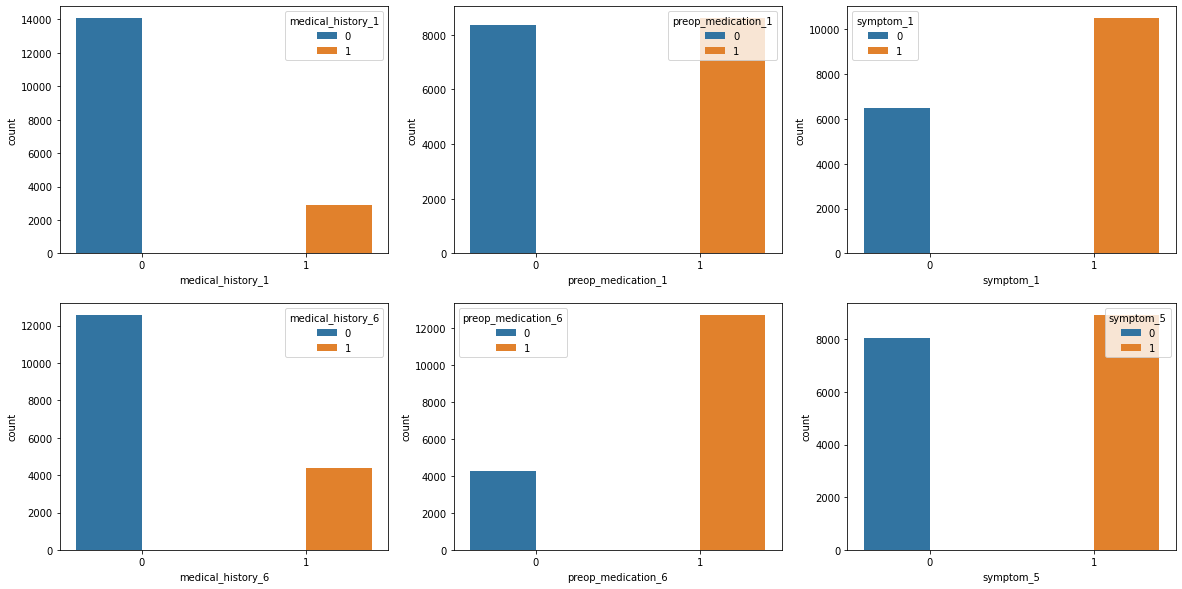

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))

sns.countplot(x = 'medical_history_1', data = df, hue = 'medical_history_1', ax = axes[0,0])
sns.countplot(x = 'preop_medication_1', data = df, hue = 'preop_medication_1', ax = axes[0,1])
sns.countplot(x = 'symptom_1', data = df, hue = 'symptom_1', ax = axes[0,2])
sns.countplot(x = 'medical_history_6', data = df, hue = 'medical_history_6', ax = axes[1,0])
sns.countplot(x = 'preop_medication_6', data = df, hue = 'preop_medication_6', ax = axes[1,1])
sns.countplot(x = 'symptom_5', data = df, hue = 'symptom_5', ax = axes[1,2]);

###Remaining Categorical variables


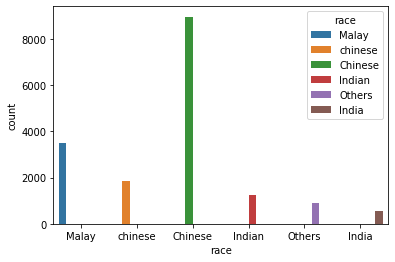

In [ ]:
sns.countplot(x = 'race', data = df, hue='race');

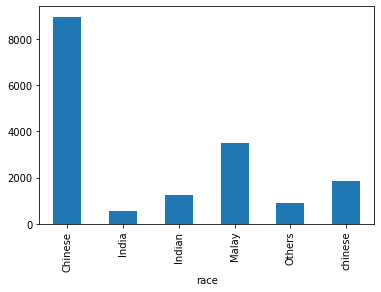

In [ ]:
df.groupby(['race'],as_index=True)['patient_id'].count().plot(rot=90,kind="bar")

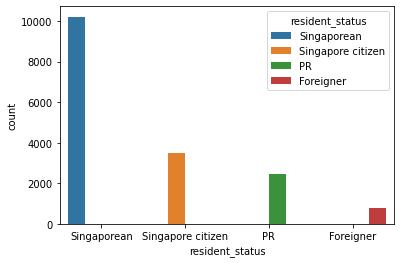

In [ ]:
sns.countplot(x = 'resident_status', data = df, hue = 'resident_status');

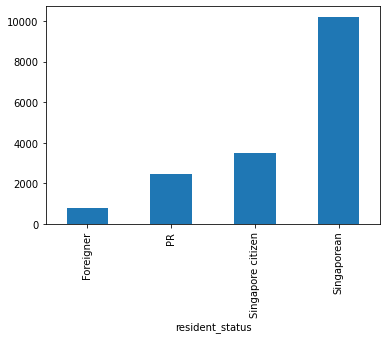

In [ ]:
df.groupby(['resident_status'],as_index=True)['patient_id'].count().plot(rot=90,kind="bar")

In [ ]:
df.groupby('gender')[['medical_history_1']].mean()

,medical_history_1
gender,
Female,0.174299
Male,0.166350


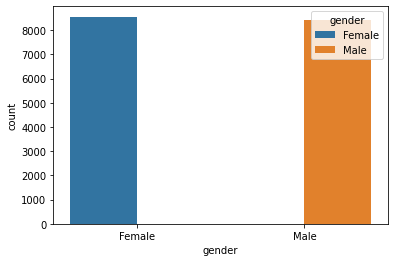

In [ ]:
sns.countplot(x = 'gender', data = df, hue = 'gender');

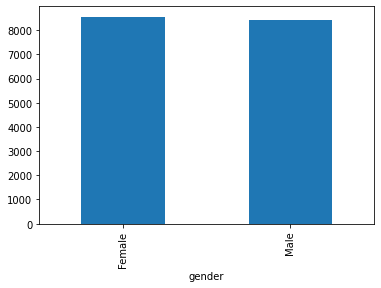

In [ ]:
df.groupby(['gender'],as_index=True)['patient_id'].count().plot(rot=90,kind="bar")

## Continuous Variables

In [ ]:
list(df.select_dtypes('number').columns)

['bill_id',
 'amount',
 'medical_history_1',
 'medical_history_2',
 'medical_history_4',
 'medical_history_5',
 'medical_history_6',
 'medical_history_7',
 'preop_medication_1',
 'preop_medication_2',
 'preop_medication_3',
 'preop_medication_4',
 'preop_medication_5',
 'preop_medication_6',
 'symptom_1',
 'symptom_2',
 'symptom_3',
 'symptom_4',
 'symptom_5',
 'lab_result_1',
 'lab_result_2',
 'lab_result_3',
 'weight',
 'height']

In [ ]:
df.groupby('medical_history_1')[['amount', 'bill_id']].mean()

,amount,bill_id
medical_history_1,,
0,5243.818629,5.012842e+09
1,6498.793052,4.929874e+09


In [ ]:
df.groupby('patient_id')[['amount']].mean()

,amount
patient_id,
00225710a878eff524a1d13be817e8e2,1297.641674
0029d90eb654699c18001c17efb0f129,5650.374468
0040333abd68527ecb53e1db9073f52e,4361.795409
00473b58e3dc8ae37b3cb34069705083,3821.470805
0078662d1d983dde68ea057c42d5b5cf,18369.467252
...,...
ffa5a615a4cc5fb1ada0443edc1f5dd3,1169.016545
ffac3c4b6838f42625e1dd00dd7c867b,3512.260693
ffc19537fa6621512ef4f296d60896ce,7513.405243


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


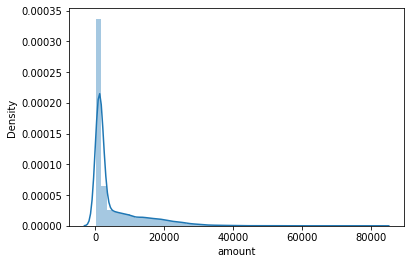

In [ ]:
sns.distplot(df['amount']);

In [ ]:
df['amount'].skew()

2.2752204657548454

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


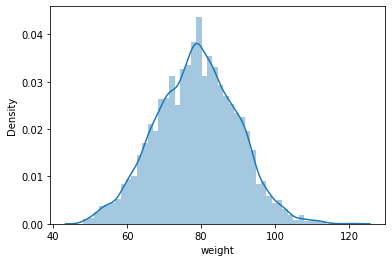

In [ ]:
sns.distplot(df['weight']);

In [ ]:
df['weight'].skew()

-0.001119735709512571

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


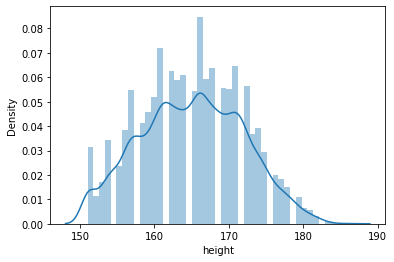

In [ ]:
sns.distplot(df['height']);

In [ ]:
df['lab_result_1'].skew()

0.0033400626648064126

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


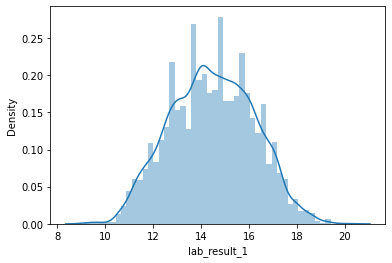

In [ ]:
sns.distplot(df['lab_result_1']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


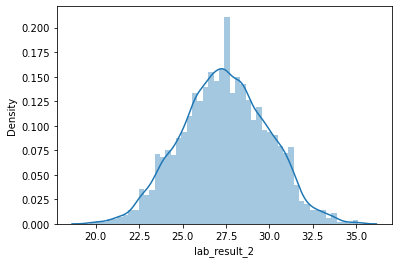

In [ ]:
sns.distplot(df['lab_result_2']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


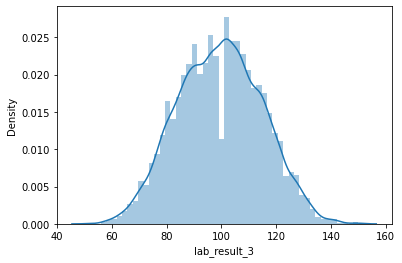

In [ ]:
sns.distplot(df['lab_result_3']);

In [ ]:
df['patient_id'] = pd.to_numeric(df['patient_id'],errors='coerce')
df = df.replace(np.nan, 0, regex=True)
df['patient_id'] = df['patient_id'].astype(int)

In [ ]:
df['bill_id'].fillna(int(df['bill_id'].mean()), inplace=True)
df['patient_id'].fillna(int(df['patient_id'].mean()), inplace=True)
df['amount'].fillna(int(df['amount'].mean()), inplace=True)
df['medical_history_1'].fillna(int(df['medical_history_1'].mean()), inplace=True)
df['preop_medication_1'].fillna(int(df['preop_medication_1'].mean()), inplace=True)
df['lab_result_3'].fillna(int(df['lab_result_3'].mean()), inplace=True)
df['lab_result_1'].fillna(int(df['lab_result_1'].mean()), inplace=True)
df['lab_result_2'].fillna(int(df['lab_result_2'].mean()), inplace=True)

###Sweetviz
Beautiful and High Density Visualizations for Exploratory Data Analysis

import sweetviz as sv

eda = sv.analyze([df, "data"],target_feat='medical_history_1')

eda.show_html('Report.html')

In [ ]:
data = df.drop(['medical_history_2','medical_history_4','medical_history_5','medical_history_6','date_of_birth','gender','race','resident_status','date_of_discharge','medical_history_3','medical_history_7','preop_medication_2','preop_medication_3','preop_medication_4','preop_medication_5','preop_medication_6','symptom_1','symptom_2','symptom_3','symptom_4','symptom_5','weight','height', 'date_of_admission_x','date_of_admission_y', 'id'],axis = 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data['bill_id'] = scaler.fit_transform(data[['bill_id']])

data['amount'] = scaler.fit_transform(data[['amount']])

X = data


In [ ]:
X.dtypes

bill_id               float64
amount                float64
patient_id              int64
medical_history_1       int64
preop_medication_1      int64
lab_result_1          float64
lab_result_2          float64
lab_result_3          float64
dtype: object

In [ ]:
X.isnull().sum()


bill_id               0
amount                0
patient_id            0
medical_history_1     0
preop_medication_1    0
lab_result_1          0
lab_result_2          0
lab_result_3          0
dtype: int64

In [ ]:
X.astype(int)

,bill_id,amount,patient_id,medical_history_1,preop_medication_1,lab_result_1,lab_result_2,lab_result_3
0,0,0,0,0,0,17,31,98
1,0,0,0,0,0,17,31,98
2,0,0,0,0,0,17,31,98
3,0,0,0,0,0,17,31,98
4,0,0,0,0,1,15,28,68
...,...,...,...,...,...,...,...,...
16971,0,0,0,0,1,15,29,113
16972,0,0,0,0,1,12,29,115
16973,0,0,0,0,1,12,29,115
16974,0,0,0,0,1,12,29,115


In [ ]:
X['medical_history_1'].value_counts()

0    14084
1     2892
Name: medical_history_1, dtype: int64

In [ ]:
x = X.drop('medical_history_1', axis = 1)
y = X['medical_history_1']

# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
ridge_classifier = RidgeClassifier().fit(x_train, y_train)

In [ ]:
y_prediction = ridge_classifier.predict(x_train)

print(f'Accuracy of Ridge Classifier on Train Set : {accuracy_score(y_train, y_prediction)*100:.2f}%')

Accuracy of Ridge Classifier on Train Set : 82.89%


Model Evaluation 

In [ ]:
y_prediction = ridge_classifier.predict(x_test)

print(f'Accuracy of Ridge Classifier on Test Set : {accuracy_score(y_test, y_prediction)*100:.2f}%')

Accuracy of Ridge Classifier on Test Set : 83.27%


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, max_depth = 10).fit(x_train, y_train)

y_prediction = rfc.predict(x_train)

print(f'Accuracy of Random Forest Classifier on Train Set : {accuracy_score(y_train, y_prediction)*100:.2f}%')

y_prediction = rfc.predict(x_test)

print(f'Accuracy of Random Forest Classifier on Test Set : {accuracy_score(y_test, y_prediction)*100:.2f}%')

Accuracy of Random Forest Classifier on Train Set : 83.51%
Accuracy of Random Forest Classifier on Test Set : 83.48%


Accuracy on Training Set is  more that Represents Overfitting.

We can Decrease the Depth of the Tree to Prevent Model from Overfitting, 

We Must Carefully Optimize the Parameters, Parameter Tuning is Very Critical Part.

We can Increase the Number of Trees which will Help the Model to be more Generalized and Reduce Overfitting.

Another way is to do Cross Validation which Allows to Use Every Sample in Train Set and Test Set.



# #Grid Search Cross Validation


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters  = {'n_estimators' : [150, 200, 250, 300], 'max_depth' : [15, 20, 25]}

gsv_rfc = GridSearchCV(estimator = rfc, param_grid = parameters, n_jobs = -1, cv = 5).fit(x_train,y_train)

In [ ]:
# Best Parameters :

gsv_rfc.best_params_

{'max_depth': 25, 'n_estimators': 200}

In [ ]:
# Best Score :

print(f'Best Accuracy Score obtained from Grid Search Cross Validation : {gsv_rfc.best_score_*100:.2f}%')

Best Accuracy Score obtained from Grid Search Cross Validation : 83.98%


Grid Search Cross Validation has Improved the Accuracy Score of the Model.

Checking the Accuracy of Model on the Entire Data Set.

In [ ]:
gsv_rfc = GridSearchCV(estimator = rfc, param_grid = parameters, n_jobs = -1, cv = 5).fit(x,y)

print(f'Best Accuracy Score obtained from Grid Search Cross Validation : {gsv_rfc.best_score_*100:.2f}%')

Best Accuracy Score obtained from Grid Search Cross Validation : 82.81%
